<a href="https://colab.research.google.com/github/CodeWithSridhar/Projects/blob/main/Dragon_Real_Estates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd

In [71]:
housing = pd.read_csv("/content/data.csv")

In [72]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN


In [73]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(14), int64(3)
memory usage: 67.3 KB


In [74]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [75]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [76]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,0.0,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN,NaN,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN,NaN,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN,NaN,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN,NaN,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN,NaN,NaN
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN,NaN,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN,NaN,NaN


In [77]:
del housing['Unnamed: 16']

In [78]:
del housing['Unnamed: 15']

In [79]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN


In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6495877a10>,
      dtype=object)

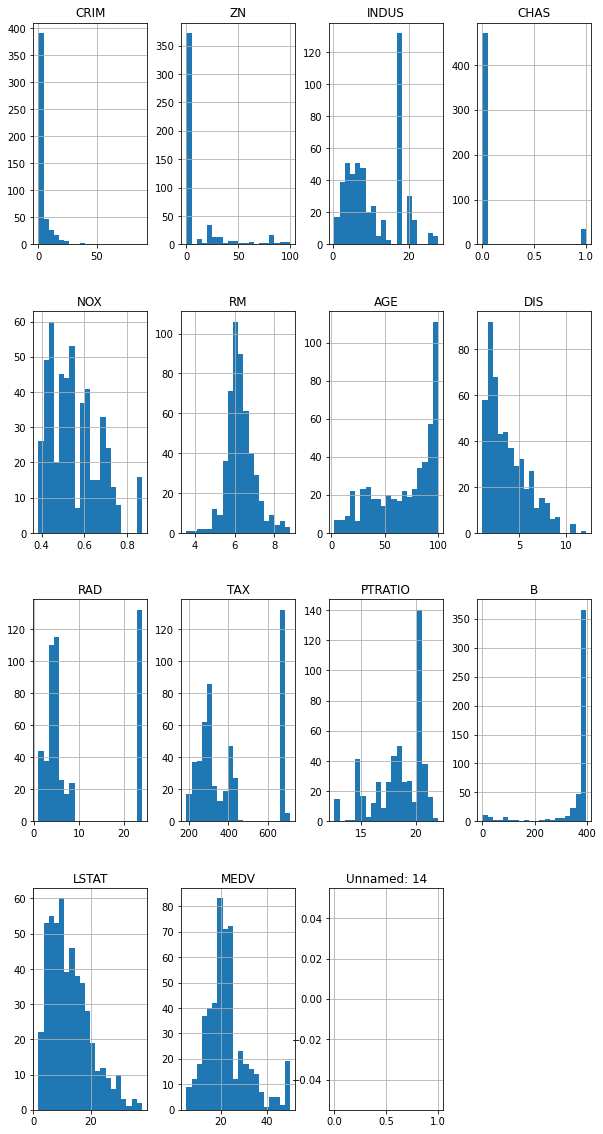

In [81]:
housing.hist(bins=20, figsize = (10,20))

# Train Test Splitting

import numpy as np

In [82]:
# import numpy as np


In [83]:
# def split_train_test(data, test_ratio):
#   np.random.seed(42)
#   shuffled = np.random.permutation(len(data))
#   test_set_size = int(len(data)* test_ratio)
#   test_indices = shuffled[:test_set_size]
#   train_indices = shuffled[test_set_size:]
#   return data.iloc[train_indices], data.iloc[test_indices]

In [84]:
# train_set, test_set = split_train_test(housing, 0.2)

In [85]:
# print(f"rows in train sets: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

In [86]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state= 42)
print(f"rows in train sets: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

rows in train sets: 404
 Rows in test set: 102



In [87]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [88]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5,NaN
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,NaN
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1,NaN
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0,NaN
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6,NaN
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0,NaN
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0,NaN
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3,NaN


In [89]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [90]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [91]:
# 95/7

In [92]:
# 376/28

In [93]:
housing = strat_train_set.copy()

#looking for correlations

In [94]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV           1.000000
RM             0.679894
B              0.361761
ZN             0.339741
DIS            0.240451
CHAS           0.205066
AGE           -0.364596
RAD           -0.374693
CRIM          -0.393715
NOX           -0.422873
TAX           -0.456657
INDUS         -0.473516
PTRATIO       -0.493534
LSTAT         -0.740494
Unnamed: 14         NaN
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6492dcb690>,
      dtype=object)

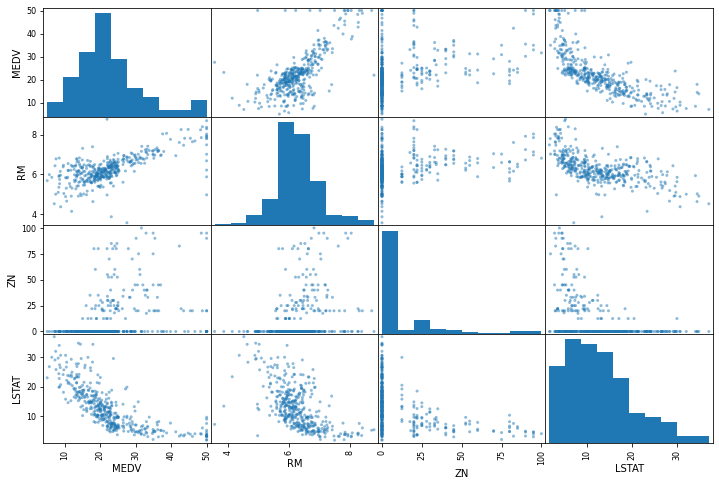

In [95]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

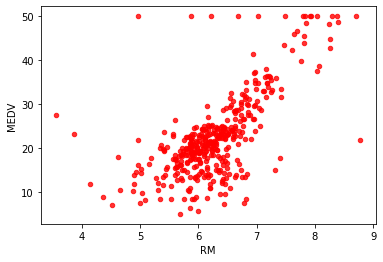

In [96]:
housing.plot(kind="scatter", x="RM",y="MEDV", alpha =0.8, c="R")

# Trying attribute combinations

In [97]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [98]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,NaN,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,NaN,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,NaN,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,NaN,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,NaN,45.468948


In [99]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV           1.000000
RM             0.679894
B              0.361761
ZN             0.339741
DIS            0.240451
CHAS           0.205066
AGE           -0.364596
RAD           -0.374693
CRIM          -0.393715
NOX           -0.422873
TAX           -0.456657
INDUS         -0.473516
PTRATIO       -0.493534
TAXRM         -0.525160
LSTAT         -0.740494
Unnamed: 14         NaN
Name: MEDV, dtype: float64

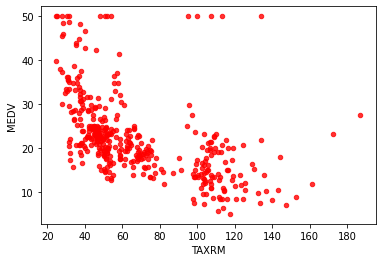

In [100]:
housing.plot(kind="scatter", x="TAXRM",y="MEDV", alpha =0.8, c="R")

To take care of missing attributes, you have three options:

1. Get rid of the missing data points
2. Get rid of the whole attribute
3. Set the vale of some value (0, mean or median)

In [101]:
housing.shape

(404, 16)

In [102]:
# using option 1
a=housing.dropna(subset=["RM"])
a.shape

(404, 16)

In [103]:
housing.drop("RM", axis = 1).shape #option2
# note that there is no RM colum and also note that the original housing datafame wwill remain unchanged

(404, 15)

In [104]:
median= housing["RM"].median() # compute median for option3
median

6.21

In [105]:
housing["RM"].fillna(median) #option3
# note that the original housing dataframe will remain unchanged 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [112]:
housing.shape

(404, 16)

In [113]:
housing.describe()  #before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,0.0,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,NaN,67.480852
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,NaN,31.457774
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,NaN,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,NaN,44.801475
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,NaN,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,NaN,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,NaN,187.026116


In [ ]:
del housing["Unnamed: 14"]

In [114]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [115]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21000000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01,            nan, 5.39474541e+01])

In [116]:
imputer.statistics_.shape

(16,)

In [110]:
X = imputer.transform(housing)

In [123]:
housing_tr = pd.DataFrame(X, columns= housing.columns)

In [124]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.480852
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.457774
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.801475
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


# Scikit-learn Design

Primarly, three types of objects
1. **Estimators**- It estimates some paramater based on a dataset. e.g-Imputer
It has a fit method and transform method.
Fit method- Fits the dataset and calculates internal parameter.

2. **Transformers**- tranform method takes input and return output based on the learning from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. **Predictors**- Linear Regression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evalute the prediction.


# Feature Scaling

Primarily, two types of feature scaling methods:

1. ** Min-max scaling (Normalization)**
        (value-min)/(max-min)
        sklearn provides a class called MinMaxScaler for this process...

2. **Standardization**
        (value - mean)/std
        sklearn provides a class called StandardScalar for this process


## Creating a Pipeline

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy = 'median')),
                        # add as many as you want in your pipeline
                        ('std_scalar', StandardScalar()),
])

NameError: ignored